In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
cancer_data = pd.read_csv('cancer.csv')

In [4]:
print(cancer_data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(cancer_data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

<Axes: >

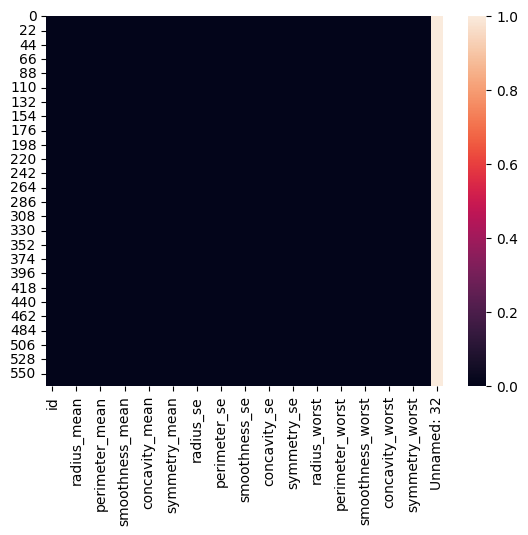

In [7]:
sns.heatmap(cancer_data.isnull())

In [8]:
cancer_data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
print(cancer_data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [9]:
cancer_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

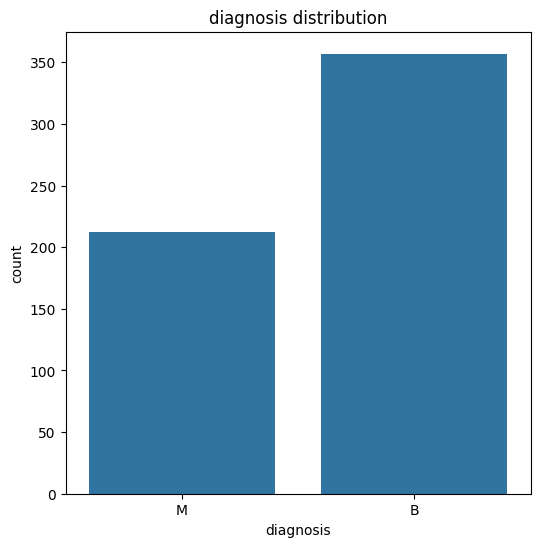

In [10]:
# for diagnosis use countplot
plt.figure(figsize=(6,6))
sns.countplot(x='diagnosis', data=cancer_data) 
plt.title('diagnosis distribution')
plt.show

In [11]:
cancer_data.replace({"diagnosis": {"M": 1, "B": 0}}, inplace=True)
print(cancer_data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

/tmp/ipykernel_4940/1420580468.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_data.replace({"diagnosis": {"M": 1, "B": 0}}, inplace=True)


In [12]:
cancer_data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### devide into target(dependent) and predictors(independent)

In [13]:
Y = cancer_data["diagnosis"] # target variable
X = cancer_data.drop(['diagnosis'], axis=1) # feature variables

In [14]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [15]:
print(X.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [16]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


### normalization and preprocessing of data


In [17]:
#create a standard scaler object
scaler = StandardScaler()

#fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


### spilting the data on traning data and testing data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=42)

#### train the logistic regration model

In [19]:
#crete a logistic regression model instance
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, Y_train)
print("Model training completed.")

#make predictions on the test data
Y_pred = log_reg.predict(X_test)
print("Predictions on test data completed.")
print(Y_pred)

Model training completed.
Predictions on test data completed.
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


### evaluation of model

In [20]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 98.25%


In [21]:
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### testing on real data

In [22]:
new_data = [[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]]

In [28]:
pred = log_reg.predict(new_data)
print("Predictions on test data completed.")
if pred[0] == 1:
    print("The tumor is malignant.")
else:
    print("The tumor is benign.")

Predictions on test data completed.
The tumor is malignant.


### Save Your Model and Scaler in Python

In [29]:
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


### ROC Curve + AUC Score

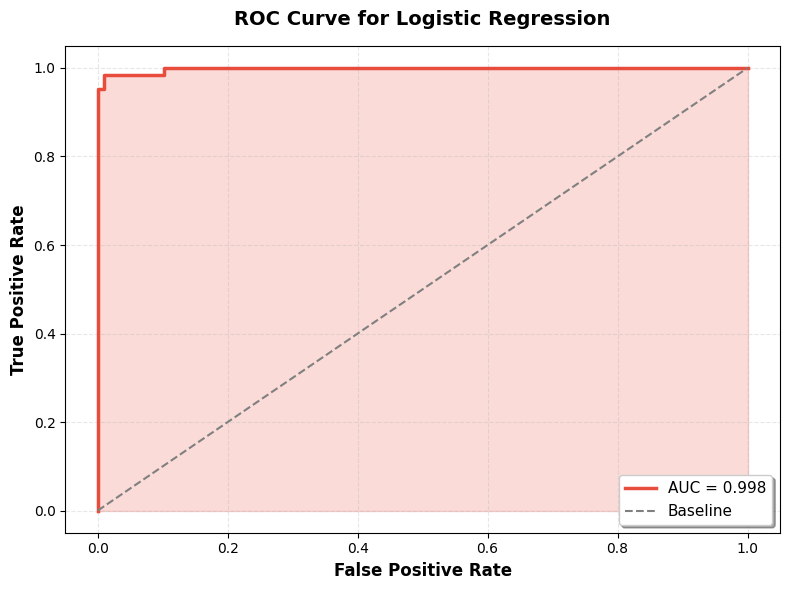

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get ROC values
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probability for class = 1
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_score = roc_auc_score(Y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Main ROC curve
plt.plot(fpr, tpr, color="#e74c3c", linewidth=2.5, label=f"AUC = {auc_score:.3f}")

# Fill the area under curve
plt.fill_between(fpr, tpr, alpha=0.2, color="#e74c3c")

# Baseline (random classifier)
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", linewidth=1.5, label="Baseline")

# Customization
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.title("ROC Curve for Logistic Regression", fontsize=14, fontweight="bold", pad=15)

plt.legend(loc="lower right", fontsize=11, frameon=True, shadow=True, fancybox=True)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


### Feature importance from logistic regression coefficients

/tmp/ipykernel_4940/3487280954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance.head(10), palette="viridis")


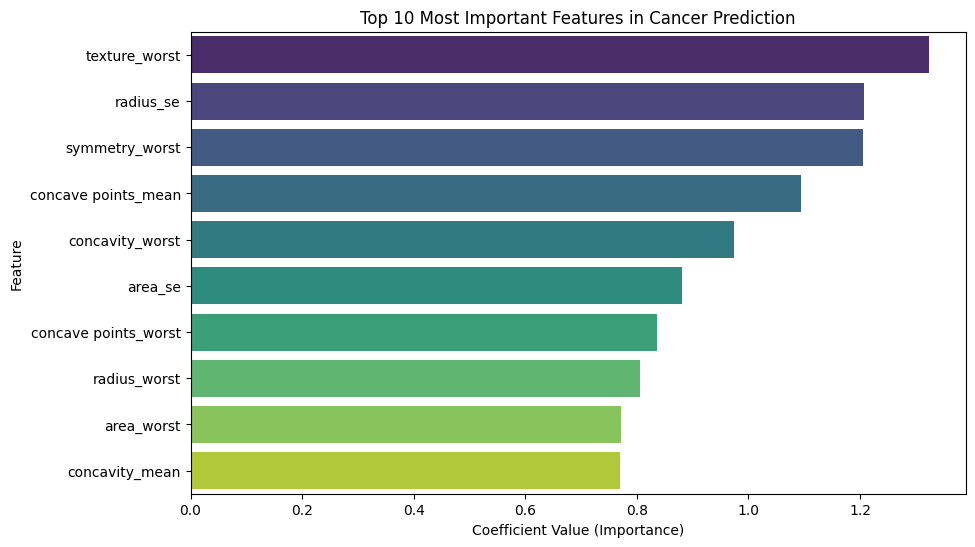

In [26]:
# Feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": log_reg.coef_[0]
}).sort_values(by="importance", key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feature_importance.head(10), palette="viridis")
plt.title("Top 10 Most Important Features in Cancer Prediction")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()